<a href="https://colab.research.google.com/github/h4nek/C-C---Digital-Forensics---Black-Market/blob/main/Black_Market_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Black Market Analysis

Assignment Group 2

2022-CSC-1A

Oct 5, 2022



**Name, Student Number**

Hynek Noll, s3102181

Sven Sonneveld, s2594854



**Motivation**

To understand how the black market works, what items they are offering and if the items are legal or not.

**Goals**

To look at a black market website using the Tor browser, gather data about several different offers and sellers and determine if what they are selling is illegal or not.


## Introduction

Our goal was to analyze items and users on a black market to get a feel for how it works. The black market was accessed through Tor, a browser that uses dedicated routers, each providing VPN service to provide greater security to its users. Furthermore, it is (exclusively) able to access URLs under `.onion` domain. As such, it is widely used for different forms of illegal activity. The trade-off of Tor's security is that it can be very slow (as we have experienced).

After our brief analysis of available black markets on (e.g.) https://darknetone.com/, we've chosen to analyze [Bohemia Market](http://boh75g7wqppzbw43tvqx2sllihy25qzjmquzqsua5eemq7vxgx6rikqd.onion/). Bohemia Market is, according to [its description on DarknetOne](https://darknetone.com/market/bohemia-market/), a newer market that gained popularity after White House Market was closed. It provides a variety of goods, ranging from drugs to fraud manuals, fake IDs, and malware.

The website has a couple of measures to prevent DDoS attacks or web crawlers by employing multiple bot checkers (such as requiring the users to complete the URL and copy "obfuscated" letters). A registration was needed to be able to access the website.

## Methodology
We've logged in to the website, then picked a category. We've simply copied the first 8-16 items and repeated for multiple categories. We have put the items' properties into a table manually and afterwards did transformations using Python to generate the required table of the Sellers and a graph.

Some screenshots of the items together with the website's DDoS protection and front page can be found in the Appendix A.

In [2]:
import numpy as np
import pandas as pd
from google.colab import drive
import os

# drive.mount('/content/drive')

In [3]:
items = pd.read_csv('https://raw.githubusercontent.com/h4nek/C-C---Digital-Forensics---Black-Market/main/Items%20-%20List%201.csv')
items


,Name,Category,Seller,Seller Rating (1-5),Seller Items Sold,Price (EUR),Stock,Legality (L/I/D),Legality Explanation
0,Trenbolone Acetate / Finajet 100mg/ml 10ml Hil...,Steroids,Mr Tren,4.5,87,41.00,Unlimited,I,"Illegal in most countries, but it is e.g. lega..."
1,Ignis Pharma TMT 400mg 10ml,Steroids,gearheadz,4.8,1062,57.05,Unlimited,I,"Illegal in most countries, but it is e.g. lega..."
2,GHRP-6 & CJC-1295 Mix 10mg Bio-Peptide,Steroids,SteroidWarehouse,5.0,78,50.00,29,I,NaN
3,Testosterone Propionate 100,Steroids,americansteroids,4.8,193,35.01,990,I,"Illegal in most countries, but it is e.g. lega..."
4,ROHM Deca 300mg/ml 10ml Vial - W2,Steroids,buysteroids,4.8,544,42.22,Unlimited,I,"Illegal in most countries, but it is e.g. lega..."
...,...,...,...,...,...,...,...,...,...
111,1st Class Signed For,Benzodiazepines,buddy1950,4.8,290,5.13,999,I,NaN
112,50x SUBOXONE 8mg/2mg SUBLINGUAL FILMS - SALE,Benzodiazepines,mrfrank,4.8,54,750.30,Unlimited,I,NaN
113,1000PC // LSD ETBIKE 200 UG // Veterab Vendor ...,Benzodiazepines,MisterMolly,4.6,70,2224.95,Unlimited,I,NaN
114,5bnpd,Benzodiazepines,Chuzac12,0.0,0,100.04,Unlimited,I,NaN


In [4]:
print("Total amount of unique sellers: ",len(items["Seller"].unique()))

Total amount of unique sellers:  80


In [16]:
sellers = items.drop_duplicates(subset=['Seller'])
sellers = sellers[["Seller", "Seller Rating (1-5)", "Seller Items Sold"]]

from google.colab import data_table
data_table.DataTable(sellers, include_index=False, num_rows_per_page=25)

# sellers.to_csv('/content/drive/Shared With Me/Module 9 - Minor Cybersecurity & Cybercrime/Introduction to Digital Forensic for Cybercrime/Assignment/Sellers.csv')

,Seller,Seller Rating (1-5),Seller Items Sold
0,Mr Tren,4.5,87
1,gearheadz,4.8,1062
2,SteroidWarehouse,5.0,78
3,americansteroids,4.8,193
4,buysteroids,4.8,544
...,...,...,...
110,ExoticsClub,4.9,2009
111,buddy1950,4.8,290
112,mrfrank,4.8,54
114,Chuzac12,0.0,0


## Conclusion

The top 10 most successful sellers on the list that we have are:


         Seller  Seller Rating (1-5)  Seller Items Sold
    ExoticsClub                  4.9               2009
       NARCO710                  4.8               1436
    HarleyQuinn                  4.5               1116
      gearheadz                  4.8               1062
PlanetHollywood                  4.9                946
    buysteroids                  4.8                544
   druggiebears                  4.8                484
  GermanMasters                  4.7                467
        trustar                  4.5                447
     PlutoPacks                  4.8                393



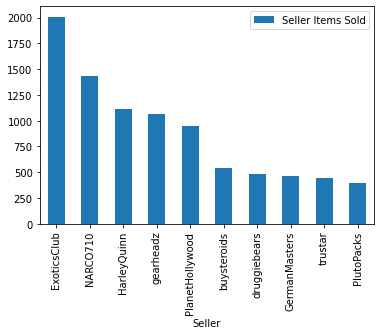

In [6]:
sorted_list_sellers = sellers.sort_values("Seller Items Sold", ascending=False)[0:10]
print(sorted_list_sellers.to_string(index=False))
print()
sorted_list_sellers = sorted_list_sellers.drop(columns=['Seller Rating (1-5)'])
sellers_graph = sorted_list_sellers.set_index('Seller').plot.bar()

From all these listings we've selected the 3 most suprising. First item is *1kg of gold flakes*, selling for around 50000 euros. This is also suprising because the price per kg of gold is around 54000 euros, which would mean the seller could earn more if it was sold as a normal gold. Another item would be "Pikachu Pills" and similarly named drugs ("NASA Rockets"), using seemingly arbitrary names from popculture. The third suprising listing was a software called "MOBILedit Forensic" that, according to the description, lets you 'work like the CIA'.

In [7]:
print("Item 1")
print(items.loc[69,:])
print()
print("Item 2")
print(items.loc[27,:])
print()
print("Item 3")
print(items.loc[83,:])

Item 1
Name                    Buy 1KG Gold Flakes
Category                  Counterfeit Items
Seller                            Alphahome
Seller Rating (1-5)                     4.7
Seller Items Sold                         2
Price (EUR)                         50020.0
Stock                             Unlimited
 Legality (L/I/D)                         L
Legality Explanation                    NaN
Name: 69, dtype: object

Item 2
Name                    10x-250x 2CB Pikachu Pills 26mg WW USA AUS EC
Category                                                 Psychedelics
Seller                                                   OldAmsterdam
Seller Rating (1-5)                                               4.5
Seller Items Sold                                                  89
Price (EUR)                                                       5.0
Stock                                                       Unlimited
 Legality (L/I/D)                                                   I
Legal

We've also selected 3 sellers that the police should investigate:

In [14]:
print(sellers[sellers['Seller'].isin(['WONDERLAND', 'SteroidWarehouse', 'gearheadz'])].to_string(index=False))

          Seller  Seller Rating (1-5)  Seller Items Sold
       gearheadz                  4.8               1062
SteroidWarehouse                  5.0                 78
      WONDERLAND                  5.0                 29


The first one is *gearheadz* - they have 1062 items sold, which puts them at 4th place for most items sold (from the sellers we’ve investigated), and they sell a variety of things (steroids, prescription drugs), all of which are illegal unless prescribed by a doctor.

Another seller is *SteroidWarehouse* - this seller is selling steroids, more specifically growth hormones, some of which are reportedly completely illegal to possess in the Netherlands ([GHRP-6 & CJC-1295 Mix](https://blog.uwgb.edu/ruthd/2022/01/20/one-dozen-advantages-of-using-cjc-1295-and-ghrp-6-in-combination/)).

The third seller would be *WONDERLAND* who is selling XTC and the reasons are that the amount being sold is quite large (1000 pills) and the item is also expensive (1999 EUR). This mean that this seller is offering large quantities of hard drugs. And since the stock is specified as 'Unlimited', it could mean that they are producing the drug at a large scale.

In [15]:
print(items.loc[105,:])

Name                    XTC YELLOW BITCOIN 250MG - 1000 PILLS
Category                                              Ecstasy
Seller                                             WONDERLAND
Seller Rating (1-5)                                       5.0
Seller Items Sold                                          29
Price (EUR)                                            1999.0
Stock                                               Unlimited
 Legality (L/I/D)                                           I
Legality Explanation                                      NaN
Name: 105, dtype: object


## Reflection

During this assignment, there were a few things regarding the methodology that could be improved. One of them would be that each listing had to be manually trascribed, which took a lot of time. However, there is no easy way to transcribe it faster as the website itself uses the .onion extension, so there is no easy way to make a program to copy each listing. Since the browsing was very slow at times, 

Overall, it gave us an overview of what items can be found on black markets and an example of how do the markets operate, especially regarding the measures they take to not get compromised or taken down.

## Appendix A

<figure>
  <img src="https://drive.google.com/uc?export=view&id=1ao_0CPFOIcTGl394m3jqg70uJQVP9r17" width="250">
  <figcaption>Fig.1 DDoS Defender Loading</figcaption>
</figure>
<figure>
  <img src="https://drive.google.com/uc?export=view&id=1s1MwvTHnBWWAO1VojN5zn947LbgLptPW" width="250">
  <figcaption>Fig.2 DDoS Defender Check</figcaption>
</figure>
<figure>
  <img src="https://drive.google.com/uc?export=view&id=1_76hblivwHoT1VHQsgli2VneRK-k5jYu" width="500" />
  <figcaption>Fig.3 Bohemia Market Front Page</figcaption>
</figure>

<!-- <img src="https://drive.google.com/uc?export=view&id=1ao_0CPFOIcTGl394m3jqg70uJQVP9r17" width="250" /> -->
<!-- <img src="https://drive.google.com/uc?export=view&id=1s1MwvTHnBWWAO1VojN5zn947LbgLptPW" width="250" /> -->
<!-- <img src="https://drive.google.com/uc?export=view&id=1_76hblivwHoT1VHQsgli2VneRK-k5jYu" width="500" /> -->
<!-- <img src="https://drive.google.com/uc?export=view&id=1jMjJR5d198qwa1U8r6HeXG5sV6Hul9fu" /> -->
<!-- <br>Steroids<br>
<img src="https://drive.google.com/uc?export=view&id=1MquaHBeDhWScD0fUoAGBy4dIckMJ9mLD" width="400" />
<br>Counterfeit Items<br>
<img src="https://drive.google.com/uc?export=view&id=1G-cz-8qH09bFWEw-fnz-Qr5ruo_dXXWf" width="400" /> -->

<figure>
  <img src="https://drive.google.com/uc?export=view&id=1MquaHBeDhWScD0fUoAGBy4dIckMJ9mLD" style="width:60%">
  <figcaption>Fig.4 Bohemia Market Listing Steroids</figcaption>
</figure>
<figure>
  <img src="https://drive.google.com/uc?export=view&id=1G-cz-8qH09bFWEw-fnz-Qr5ruo_dXXWf" style="width:60%">
  <figcaption>Fig.5 Bohemia Market Listing Counterfeit Items</figcaption>
</figure>

<figure>
  <img src="https://drive.google.com/uc?export=view&id=1jMjJR5d198qwa1U8r6HeXG5sV6Hul9fu" >
  <figcaption>Fig.6 DDoS Filter Killing Our Path</figcaption>
</figure>



<!-- ![Listing_Steroids](https://drive.google.com/uc?export=view&id=1MquaHBeDhWScD0fUoAGBy4dIckMJ9mLD)
![Listing_Counterfeit](https://drive.google.com/uc?export=view&id=1G-cz-8qH09bFWEw-fnz-Qr5ruo_dXXWf) -->